

# Project: IMDB Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
# Introduction

## in this project i'll be Analyzing the IMDB Movies Dataset...

## i'll explore and questioning about the budget, the release years of the movies,etc

## The question that im going to ask is >>

## is the release year affect on the budget of the movies ??

## at wich year there is the highest counts of movies ?

## what is the average of the people vote on movies ?



## At first we have to import the libraries that we'll use in this project.

In [66]:

import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


## i imported the pandas and the matplotlib.

<a id='wrangling'></a>
## Data Wrangling



### General Properties

## After the import we have to read and load our Dataset..
## i choosed the IMDB_Movies_Dataset..

In [4]:
df = pd.read_csv('IMDB_Movies.csv')

## then i wanted to Know what shape of the dataset that i have..

In [5]:
df.shape

(10866, 21)

## Then i wanted to know if there is any missing values..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##  After i knew that there is a missing values i had to clean it and orgnize it..

In [7]:
df.drop(['id', 'imdb_id', 'keywords', 'homepage', 'tagline'], axis=1, inplace=True)


### and there are some columns i dont need so i'll drop it
#### i dropped "tagline', 'keywords', 'id', 'imdb_id', 'homepage'


In [8]:
df.dropna(inplace=True)
#i droped the rows with the missing values becuase i cant fill them .

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
overview                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [67]:
df.head(50)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


## in here i relized that the (budget, revenue) columns have some zeros values and i had to remove them so this how i did it..

In [86]:
df = df[(df[['budget','revenue']] != 0).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3806 non-null float64
budget                  3806 non-null int64
revenue                 3806 non-null int64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
overview                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 505.5+ KB


## ---------------------------------and here the dataset is ready i guess---------------------------------

<a id='eda'></a>
## Exploratory Data Analysis







# The Vote Average!

# what is the average of the people vote on movies ?

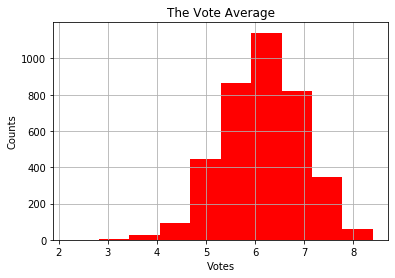

In [99]:
df.vote_average.hist(color='red');
plt.title('The Vote Average');
plt.xlabel('Votes');
plt.ylabel('Counts');

### as you can see between 6 and 7 is the biggest count of movies!

# The Release Years of the Movies!

# At wich year there is the highest counts of movies ?

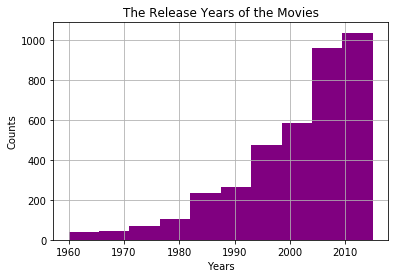

In [98]:
df.release_year.hist(color='purple');
plt.title('The Release Years of the Movies');
plt.xlabel('Years');
plt.ylabel('Counts');

### as you can see after the 90's, the Movie count is getting bigger and bigger!

# Compare between the budget and Release Year

# is the Release Year affect on the Budget of the movies ??

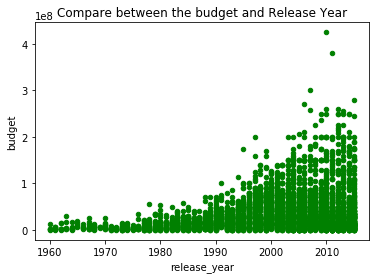

In [101]:
df.plot(x="release_year", y="budget", kind="scatter", color='green');
plt.title('Compare between the budget and Release Year');

## as you can see before in the 1960's the budget was very low but now the budget is getting very high !

# In Conclusion:

## The Major findings in this project,
### That i found the revenues is getting higher and higher over the years


## After i did the analysis of this dataset there are somethings that got in my way,
## and i found it difficult to deal with it Like the Null values, should i just drop them ?
## or get the (mean) and fill them with it, something Like that... 

